In [1]:
pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 10.2 MB/s eta 0:00:00


In [3]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [7]:
class AgentState(TypedDict):
    player_name: str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int

In [18]:
answer = 1

In [27]:
def setup(state: AgentState):
    """ """
    state["player_name"] = "Student"
    state["guesses"] = []
    state["attempts"] = 0
    state["lower_bound"] = 1
    state["upper_bound"] = 20
    return state

def guess(state: AgentState):
    """ """
    guess = int((state["lower_bound"] + state["upper_bound"]) / 2)
    state["guesses"].append(guess)
    state["attempts"] += 1
    print(f"Is it: {guess}?")
    return state

def hint_node(state: AgentState):
    """ ...  is the answer """
    if state["guesses"][-1] < answer:
        print("The answer is larger.")
        state["lower_bound"] = state["guesses"][-1] + 1
    elif state["guesses"][-1] > answer:
        print("The answer is smaller.")
        state["upper_bound"] = state["guesses"][-1] - 1

    return state

def decide(state: AgentState):
    """ """
    if state["guesses"][-1] == answer:
        print("You have guessed it right!")
        return "end"
    elif state["attempts"] >= 7:
        print("Attempts reached limit.")
        return "end"
    else:
        return "continue"

In [28]:
graph = StateGraph(AgentState)

graph.add_node("setup", setup)
graph.add_node("guess", guess)
graph.add_node("hint_node", hint_node)

graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint_node")
graph.add_conditional_edges(
    "hint_node",
    decide,
    {
        "end": END,
        "continue": "guess",
    }
)

app = graph.compile()

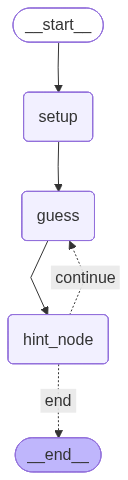

In [29]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [30]:
app.invoke({})

Is it: 10?
The answer is smaller.
Is it: 5?
The answer is smaller.
Is it: 2?
The answer is smaller.
Is it: 1?
You have guessed it right!


{'player_name': 'Student',
 'guesses': [10, 5, 2, 1],
 'attempts': 4,
 'lower_bound': 1,
 'upper_bound': 1}